In [1]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd

# We are also going to do some basic viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import pickle
import numpy as np

In [2]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [3]:
with open('data/df_all.pickle', 'rb') as f:
    df = pickle.load(f)

## Split data into train and test

In [4]:
len(df)

11826

In [5]:
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
df_train, df_test = train_test_split(df, test_size=.20, random_state=42)

In [7]:
X_train = df_train.iloc[:,6:31]
y_train = df_train['category']
X_test = df_test.iloc[:,6:31]
y_test = df_test['category']

In [8]:
len(df.columns)

32

In [9]:
X_train

,ate_less,low_cal_foods,ate_less_fat,exercise,skip_meals,'diet'_foods,liquid_diet,wt_loss_program,rx_diet_pills,non-rx_diet_pills,...,fruit_veg_salad,change_eat_habits,less_sugar,less_junk_fast,surgery,vig_work_days,mod_work_days,walk_bike_days,vig_rec_days,mod_rec_days
1199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,4.0,0.0,2.0
11480,0,0,0,13.0,0,0,0,0,0,0,...,0,0,0,0,2.0,3.0,7.0,6.0,3.0,4.0
5595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,7.0,4.0
7228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,0.0,4.0,0.0,2.0,0.0
9252,10.0,11.0,0,13.0,0,0,0,0,0,0,...,0,0,0,46.0,2.0,0.0,3.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,10.0,0,0,13.0,14.0,0,16.0,0,0,0,...,0,0,0,0,2.0,6.0,0.0,6.0,0.0,0.0
5191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,3.0,0.0,0.0,0.0
5390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,7.0,7.0,0.0,2.0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,2.0,0.0,0.0


## Oversampling

In [10]:
import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
Obese = np.sum(y_train == 'Obese')
Average = np.sum(y_train == 'Average')
Fitness = np.sum(y_train == 'Fitness')
Athlete = np.sum(y_train == 'Athlete')
ratio = {'Obese': Obese, 'Average': Average*2, 'Fitness': Fitness*5, 'Athlete': Athlete*10} 


In [11]:
#initialize random sampler for later use
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'auto', random_state=42) 
    
# X_tr_rs, y_tr_rs = ROS.fit_resample(df_train,y_train)

## Scoring

## Functions (Model Selection Pipeline)
Things to address in pipeline:

Class Imbalance (sampling metrics)\
Kfold cross validation (small dataset) \
Modeling (parameter tuning, class weights for those it applies to) \
Metrics selected above (F1) \
ROC Curve

# Modeling

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from operator import itemgetter
from sklearn import tree
from sklearn.utils import check_random_state
import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from Sampling import SamplingGridSearchCV
from sklearn.preprocessing import LabelBinarizer

In [13]:
dum = DummyClassifier(strategy='prior')
dum_dum = dum.fit(X_train,y_train) 

In [14]:
dum_dum.predict_proba(X_test)

array([[0.00856237, 0.2089852 , 0.05158562, 0.73086681],
       [0.00856237, 0.2089852 , 0.05158562, 0.73086681],
       [0.00856237, 0.2089852 , 0.05158562, 0.73086681],
       ...,
       [0.00856237, 0.2089852 , 0.05158562, 0.73086681],
       [0.00856237, 0.2089852 , 0.05158562, 0.73086681],
       [0.00856237, 0.2089852 , 0.05158562, 0.73086681]])

In [15]:
metrics.precision_score(y_train, dum_dum.predict(X_train), average = 'macro', zero_division=0)
#note that micro will simply calculate true positives / (TP+FP), in multiclass this equals TP/all guesses = 74%
#macro will calculate TP/(TP+FP) for each class, then average across. In naive case, this is 74%*0.25 = 0.185 because obese is one of 4 classes 
#weighted this is 74%* 74% (precision for obese*obese percentage) + 0%*19% (percentage average) + 0*5%(percent fit) +0*2% (percent athlete) because obese is weighted

0.1827167019027484

In [16]:
import graphviz

In [17]:
from sklearn.metrics import make_scorer

In [18]:
my_scorer = make_scorer(f1_score,average='macro',zero_division=0)

In [19]:
y_pred = dum_dum.predict(X_train)
my_scorer(dum_dum, X_train, y_train)

0.21112739709295225

In [20]:
f1_score(y_train, dum_dum.predict(X_train), average = 'macro', zero_division=0)

0.21112739709295225

In [95]:
train_class = classification_report(y_train, dum_dum.predict(X_train), target_names = ['Athlete','Average','Fitness','Obese'], output_dict = True, zero_division=0)

In [98]:
train_class

{'Athlete': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 81},
 'Average': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1977},
 'Fitness': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 488},
 'Obese': {'precision': 0.7308668076109937,
  'recall': 1.0,
  'f1-score': 0.844509588371809,
  'support': 6914},
 'accuracy': 0.7308668076109937,
 'macro avg': {'precision': 0.1827167019027484,
  'recall': 0.25,
  'f1-score': 0.21112739709295225,
  'support': 9460},
 'weighted avg': {'precision': 0.5341662904674852,
  'recall': 0.7308668076109937,
  'f1-score': 0.6172240268501784,
  'support': 9460}}

In [21]:
y_train.value_counts()

Obese      6914
Average    1977
Fitness     488
Athlete      81
Name: category, dtype: int64

In [22]:
y_train.count()

9460

In [23]:
np.array([[30,0,15,0],[0,1,-1,0],[2.5,0,5,0],[0,.0,-50,.5]])

array([[ 30. ,   0. ,  15. ,   0. ],
       [  0. ,   1. ,  -1. ,   0. ],
       [  2.5,   0. ,   5. ,   0. ],
       [  0. ,   0. , -50. ,   0.5]])

#### Decision Tree

In [24]:
DTC_param_grid = {'max_depth':range(5,10), 'class_weight':[None,'balanced',{'Athlete':.1, 'Average':.2, 'Fitness':.6, 'Obese':.1}]}
DTC, DTC_score, DTC_params, DTC_scores_df, DTC_index, DTC_val_pred, DTC_val_true, DTC_val_pred_proba, DTC_train_scores, DTC_val_scores = \
SamplingGridSearchCV(ROS, DecisionTreeClassifier(), X_train, y_train, DTC_param_grid, folds=5)
DTC, DTC_score, DTC_index

(DecisionTreeClassifier(class_weight={'Athlete': 0.1, 'Average': 0.2,
                                      'Fitness': 0.6, 'Obese': 0.1},
                        max_depth=6),
 0.2319455698554452,
 11)

In [25]:
metrics.confusion_matrix(DTC_val_true[DTC_index],DTC_val_pred[DTC_index])

array([[   0,   14,   31,   36],
       [   0,  367,  352, 1258],
       [   0,   98,  163,  227],
       [   0,  424,  362, 6128]])

In [26]:
DTC_scores_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parameters,"{'class_weight': None, 'max_depth': 5}","{'class_weight': None, 'max_depth': 6}","{'class_weight': None, 'max_depth': 7}","{'class_weight': None, 'max_depth': 8}","{'class_weight': None, 'max_depth': 9}","{'class_weight': 'balanced', 'max_depth': 5}","{'class_weight': 'balanced', 'max_depth': 6}","{'class_weight': 'balanced', 'max_depth': 7}","{'class_weight': 'balanced', 'max_depth': 8}","{'class_weight': 'balanced', 'max_depth': 9}","{'class_weight': {'Athlete': 0.1, 'Average': 0...","{'class_weight': {'Athlete': 0.1, 'Average': 0...","{'class_weight': {'Athlete': 0.1, 'Average': 0...","{'class_weight': {'Athlete': 0.1, 'Average': 0...","{'class_weight': {'Athlete': 0.1, 'Average': 0..."
train,0.00408163,0.0121626,0.086504,0.104692,0.144592,0.161985,0.213304,0.240041,0.239698,0.258758,0.256432,0.280451,0.298799,0.328256,0.348435
val,0,0,0.0356944,0.0253387,0.0314529,0.1087,0.158449,0.152776,0.170747,0.144057,0.220821,0.231946,0.218583,0.17111,0.17099


In [27]:
len(DTC_val_pred_proba)

15

In [28]:
metrics.confusion_matrix(DTC_val_true[DTC_index],DTC_val_pred[DTC_index])

array([[   0,   14,   31,   36],
       [   0,  367,  352, 1258],
       [   0,   98,  163,  227],
       [   0,  424,  362, 6128]])

In [29]:
X_train.columns

Index(['ate_less', 'low_cal_foods', 'ate_less_fat', 'exercise', 'skip_meals',
       ''diet'_foods', 'liquid_diet', 'wt_loss_program', 'rx_diet_pills',
       'non-rx_diet_pills', 'lax_vomit', 'water', 'wh_special_diet',
       'low_carb', 'smoke', 'fruit_veg_salad', 'change_eat_habits',
       'less_sugar', 'less_junk_fast', 'surgery', 'vig_work_days',
       'mod_work_days', 'walk_bike_days', 'vig_rec_days', 'mod_rec_days'],
      dtype='object')

In [30]:
DTC.feature_importances_

array([0.19042394, 0.02116452, 0.01570052, 0.11902506, 0.00419834,
       0.00083727, 0.00539342, 0.00239418, 0.00098747, 0.0066141 ,
       0.00114991, 0.02095513, 0.00984684, 0.01605128, 0.00171171,
       0.0071563 , 0.01374268, 0.01183047, 0.0092059 , 0.04109341,
       0.07319651, 0.0585332 , 0.07217337, 0.21998677, 0.07662771])

In [31]:
list(zip(X_train.columns, DTC.feature_importances_))

[('ate_less', 0.1904239389698098),
 ('low_cal_foods', 0.021164523608119587),
 ('ate_less_fat', 0.015700515371443385),
 ('exercise', 0.11902505881199697),
 ('skip_meals', 0.004198336214168826),
 ("'diet'_foods", 0.0008372693926825399),
 ('liquid_diet', 0.005393416308156959),
 ('wt_loss_program', 0.002394180046933212),
 ('rx_diet_pills', 0.0009874708549966623),
 ('non-rx_diet_pills', 0.006614096483468759),
 ('lax_vomit', 0.0011499123655860297),
 ('water', 0.020955132212957788),
 ('wh_special_diet', 0.009846842758494699),
 ('low_carb', 0.016051284998527156),
 ('smoke', 0.001711705794162004),
 ('fruit_veg_salad', 0.007156302119558936),
 ('change_eat_habits', 0.013742675452190083),
 ('less_sugar', 0.011830471685190377),
 ('less_junk_fast', 0.009205897378626423),
 ('surgery', 0.04109341018498923),
 ('vig_work_days', 0.07319650883556539),
 ('mod_work_days', 0.0585331981873196),
 ('walk_bike_days', 0.07217337078302366),
 ('vig_rec_days', 0.21998676758479666),
 ('mod_rec_days', 0.07662771359723

#### Random Forest

In [32]:
RFC_param_grid = {'n_estimators':[50,100], 'criterion':['gini','entropy'], 'class_weight':[None,'balanced',{'Athlete':.3, 'Average':.2, 'Fitness':.4, 'Obese':.1}]}

RFC, RFC_score, RFC_params, RFC_scores_df, RFC_index, RFC_val_pred, RFC_val_true, RFC_val_pred_proba, RFC_train_scores, RFC_val_scores = \
SamplingGridSearchCV(ROS, RandomForestClassifier(), X_train, y_train, RFC_param_grid, folds=5)
RFC, RFC_score, RFC_index


(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        n_estimators=50),
 0.09642359594705516,
 6)

In [33]:
RFC_scores_df

,0,1,2,3,4,5,6,7,8,9,10,11
parameters,"{'class_weight': None, 'criterion': 'gini', 'n...","{'class_weight': None, 'criterion': 'gini', 'n...","{'class_weight': None, 'criterion': 'entropy',...","{'class_weight': None, 'criterion': 'entropy',...","{'class_weight': 'balanced', 'criterion': 'gin...","{'class_weight': 'balanced', 'criterion': 'gin...","{'class_weight': 'balanced', 'criterion': 'ent...","{'class_weight': 'balanced', 'criterion': 'ent...","{'class_weight': {'Athlete': 0.3, 'Average': 0...","{'class_weight': {'Athlete': 0.3, 'Average': 0...","{'class_weight': {'Athlete': 0.3, 'Average': 0...","{'class_weight': {'Athlete': 0.3, 'Average': 0..."
train,0.677529,0.676426,0.67599,0.674091,0.566396,0.573141,0.560467,0.575085,0.668186,0.669142,0.666089,0.675033
val,0.0626351,0.0754189,0.0601638,0.0525657,0.0893842,0.0903582,0.0964236,0.0936586,0.0739629,0.073668,0.082043,0.0867376


In [34]:
metrics.confusion_matrix(RFC_val_true[RFC_index],RFC_val_pred[RFC_index])

array([[   9,   22,   14,   36],
       [ 134,  607,  234, 1002],
       [  43,  172,   56,  217],
       [ 353, 1040,  371, 5150]])

In [35]:
print(f1_score(y_test, RFC.predict(X_test), average = 'macro', zero_division=0))
print(metrics.precision_score(y_test, RFC.predict(X_test), average = 'macro', zero_division=0))
print(metrics.recall_score(y_test, RFC.predict(X_test), average = 'macro', zero_division=0))

0.31087912923467065
0.32109447941590485
0.3083671456223943


#### Logistic Regression

In [36]:
LR_param_grid = {'class_weight':[None,'balanced',{'Athlete':.3, 'Average':.2, 'Fitness':.4, 'Obese':.1}],'solver':['lbfgs', 'liblinear','sag','saga']}
LR, LR_score, LR_params, LR_scores_df, LR_index, LR_val_pred, LR_val_true, LR_val_pred_proba, LR_train_scores, LR_val_scores = \
 SamplingGridSearchCV(ROS, LogisticRegression(), X_train, y_train, LR_param_grid, folds=5)
LR, LR_score, LR_index

/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reach

/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_

(LogisticRegression(class_weight='balanced', solver='liblinear'),
 0.19364309548800032,
 5)

In [94]:
LR_score

0.19364309548800032

In [37]:
LR_scores_df

,0,1,2,3,4,5,6,7,8,9,10,11
parameters,"{'class_weight': None, 'solver': 'lbfgs'}","{'class_weight': None, 'solver': 'liblinear'}","{'class_weight': None, 'solver': 'sag'}","{'class_weight': None, 'solver': 'saga'}","{'class_weight': 'balanced', 'solver': 'lbfgs'}","{'class_weight': 'balanced', 'solver': 'liblin...","{'class_weight': 'balanced', 'solver': 'sag'}","{'class_weight': 'balanced', 'solver': 'saga'}","{'class_weight': {'Athlete': 0.3, 'Average': 0...","{'class_weight': {'Athlete': 0.3, 'Average': 0...","{'class_weight': {'Athlete': 0.3, 'Average': 0...","{'class_weight': {'Athlete': 0.3, 'Average': 0..."
train,0.0110185,0.00408426,0.00507359,0.00305345,0.153701,0.209275,0.145884,0.165208,0.146004,0.00706591,0.110968,0.0929472
val,0.004,0,0,0,0.134825,0.193643,0.140083,0.130524,0.149012,0,0.0845649,0.0692617


In [38]:
LR_train_scores

[array([0.00506329, 0.00507614, 0.01507538, 0.01980198, 0.01007557]),
 array([0.00510204, 0.00511509, 0.        , 0.00511509, 0.00508906]),
 array([0.00507614, 0.00508906, 0.        , 0.01012658, 0.00507614]),
 array([0.00507614, 0.00510204, 0.        , 0.00508906, 0.        ]),
 array([0.16047297, 0.13417191, 0.15147059, 0.16290909, 0.15948276]),
 array([0.20377358, 0.1576507 , 0.224     , 0.23101604, 0.22993492]),
 array([0.12950296, 0.18578352, 0.1042524 , 0.16122004, 0.14866204]),
 array([0.17391304, 0.15776987, 0.17577465, 0.17591036, 0.14267185]),
 array([0.13483146, 0.08281573, 0.17504052, 0.18040435, 0.15692821]),
 array([0.00505051, 0.00507614, 0.00506329, 0.01503759, 0.00510204]),
 array([0.0893617 , 0.01909308, 0.16936937, 0.15298507, 0.12403101]),
 array([0.06113537, 0.00977995, 0.15492958, 0.12865497, 0.11023622])]

In [39]:
LR_val_scores

[array([0.  , 0.  , 0.02, 0.  , 0.  ]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 array([0.14965986, 0.12680115, 0.14044944, 0.14367816, 0.11353712]),
 array([0.22222222, 0.15853659, 0.19433198, 0.21800948, 0.17511521]),
 array([0.12411348, 0.20521173, 0.10869565, 0.17223199, 0.09016393]),
 array([0.15822785, 0.1291866 , 0.15550756, 0.15351812, 0.05617978]),
 array([0.14814815, 0.1300813 , 0.15189873, 0.13071895, 0.18421053]),
 array([0., 0., 0., 0., 0.]),
 array([0.08695652, 0.03738318, 0.10596026, 0.06349206, 0.12903226]),
 array([0.0877193 , 0.        , 0.12903226, 0.06451613, 0.06504065])]

In [40]:
type(y_train)

pandas.core.series.Series

In [41]:
y_train.value_counts()

Obese      6914
Average    1977
Fitness     488
Athlete      81
Name: category, dtype: int64

In [42]:
metrics.confusion_matrix(LR_val_true[LR_index],LR_val_pred[LR_index])

array([[   7,   11,   25,   38],
       [ 129,  287,  237, 1324],
       [  60,   82,  101,  245],
       [ 154,  351,  186, 6223]])

In [43]:
metrics.confusion_matrix(LR_val_true[3],LR_val_pred[3])

array([[   0,   25,    0,   56],
       [   0,  263,    2, 1712],
       [   0,  123,    0,  365],
       [   1,  205,    2, 6706]])

In [44]:
metrics.confusion_matrix(LR_val_true[4],LR_val_pred[4])

array([[  24,   12,   28,   17],
       [ 501,  410,  380,  686],
       [ 187,   99,  107,   95],
       [ 741, 1045,  571, 4557]])

In [45]:
len(LR_val_pred_proba[3])

9460

In [46]:
lb = LabelBinarizer()
lb.fit(['Athelete','Average','Fitness','Obese'])

LabelBinarizer()

In [47]:
LR_val_bin = lb.transform(LR_val_true[3])

In [48]:
LR_val_bin.shape

(9460, 4)

In [49]:
LR_val_bin = LR_val_bin.reshape(len(LR_val_bin),4)

In [50]:
LR_val_bin[:,]

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [51]:
len(LR_val_pred_proba)

12

In [52]:
proba = np.concatenate(LR_val_pred_proba[3]).reshape(len(LR_val_pred_proba[3]),4)

In [53]:
proba[:,1]

array([0.50997151, 0.14006229, 0.29345821, ..., 0.39308168, 0.04291741,
       0.07788956])

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc

In [55]:

precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i], _= metrics.precision_recall_curve(LR_val_bin[:,i],proba[:,i])
    average_precision[i] = average_precision_score(LR_val_bin[:, i], proba[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(LR_val_bin.ravel(),
    proba.ravel())
average_precision["micro"] = average_precision_score(LR_val_bin, proba,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.81


/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


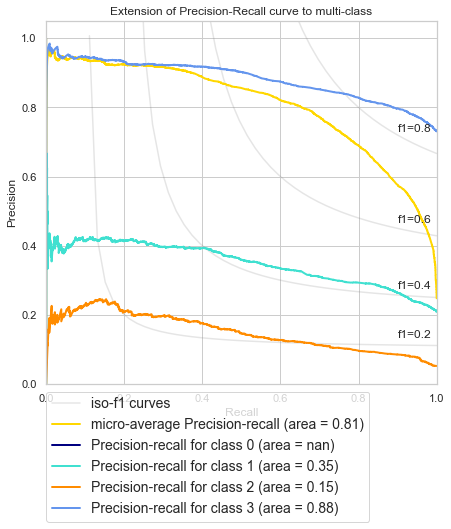

In [56]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(4), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [57]:
average_precision

{0: nan,
 1: 0.34973921691141996,
 2: 0.15073848349416732,
 3: 0.8818310168044894,
 'micro': 0.8064120489220782}

In [58]:
from sklearn.inspection import permutation_importance

In [59]:
DTC.feature_importances_

array([0.19042394, 0.02116452, 0.01570052, 0.11902506, 0.00419834,
       0.00083727, 0.00539342, 0.00239418, 0.00098747, 0.0066141 ,
       0.00114991, 0.02095513, 0.00984684, 0.01605128, 0.00171171,
       0.0071563 , 0.01374268, 0.01183047, 0.0092059 , 0.04109341,
       0.07319651, 0.0585332 , 0.07217337, 0.21998677, 0.07662771])

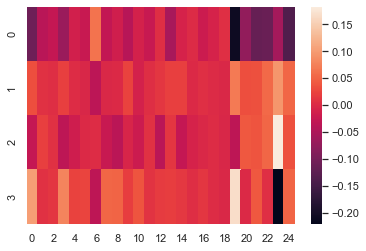

In [60]:
sns.heatmap(LR.coef_)

In [61]:
LR.intercept_

array([-0.38049533,  0.13500147, -0.26632888,  0.51182275])

#### Naive Bayes

In [62]:
GNB_param_grid = {'priors':[None,[0.25,0.25,0.25,0.25],[0.3,0.2,0.3,0.2]]}
GNB, GNB_score, GNB_params, GNB_scores_df, GNB_index, GNB_val_pred, GNB_val_true, GNB_val_pred_proba, GNB_train_scores, GNB_val_scores = \
SamplingGridSearchCV(ROS, GaussianNB(), X_train, y_train, GNB_param_grid, folds=5)
GNB, GNB_score, GNB_index


(GaussianNB(priors=[0.25, 0.25, 0.25, 0.25]), 0.014460540433097168, 1)

In [63]:
metrics.confusion_matrix(GNB_val_true[GNB_index],GNB_val_pred[GNB_index])

array([[  76,    0,    1,    4],
       [1668,    4,   42,  263],
       [ 450,    2,    7,   29],
       [4285,   10,  336, 2283]])

In [64]:
GNB_scores_df

,0,1,2
parameters,{'priors': None},"{'priors': [0.25, 0.25, 0.25, 0.25]}","{'priors': [0.3, 0.2, 0.3, 0.2]}"
train,0.0159767,0.0163433,0.0177009
val,0.0112619,0.0144605,0.0144298


In [65]:
metrics.confusion_matrix(GNB_val_true[0],GNB_val_pred[0])

array([[  76,    0,    1,    4],
       [1661,    3,   36,  277],
       [ 450,    3,    6,   29],
       [4206,    4,  315, 2389]])

In [99]:
metrics.confusion_matrix(GNB_val_true[1],GNB_val_pred[1])

array([[  76,    0,    1,    4],
       [1668,    4,   42,  263],
       [ 450,    2,    7,   29],
       [4285,   10,  336, 2283]])

In [100]:
metrics.confusion_matrix(GNB_val_true[2],GNB_val_pred[2])

array([[  76,    0,    1,    4],
       [1669,    4,   42,  262],
       [ 451,    1,    7,   29],
       [4288,   10,  339, 2277]])

In [66]:
mod = GaussianNB()
mod = mod.fit(X_train, y_train)
mod_train_pred = mod.predict(X_train)
mod_val_pred = mod.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_train, mod.predict(X_train), target_names = ['Athlete','Average','Fitness','Obese']))

              precision    recall  f1-score   support

     Athlete       0.01      0.98      0.02        81
     Average       0.43      0.00      0.00      1977
     Fitness       0.02      0.01      0.01       488
       Obese       0.88      0.37      0.52      6914

    accuracy                           0.28      9460
   macro avg       0.34      0.34      0.14      9460
weighted avg       0.74      0.28      0.38      9460



In [69]:
metrics.confusion_matrix(y_train, mod.predict(X_train))

array([[  79,    0,    0,    2],
       [1638,    3,   37,  299],
       [ 451,    1,    5,   31],
       [4105,    3,  274, 2532]])

In [70]:
x = classification_report(y_train, mod.predict(X_train), target_names = ['Athlete','Average','Fitness','Obese'],output_dict= True)

In [71]:
x['Fitness']['f1-score']

0.012437810945273632

In [72]:
x.keys()

dict_keys(['Athlete', 'Average', 'Fitness', 'Obese', 'accuracy', 'macro avg', 'weighted avg'])

#### XGBoost

In [73]:
XGB_param_grid = {'max_depth':[3,8],'class_weight':[None,'balanced']}
XGB, XGB_score, XGB_params, XGB_scores_df, XGB_index, XGB_val_pred, XGB_val_true, XGB_val_pred_proba, XGB_train_scores, XGB_val_scores = \
SamplingGridSearchCV(ROS, xgb.XGBClassifier(), X_train, y_train, XGB_param_grid, folds=5)
XGB, XGB_score, XGB_index

(XGBClassifier(base_score=0.5, booster=None, class_weight=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints=None, learning_rate=0.300000012,
               max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=0,
               num_parallel_tree=1, objective='multi:softprob', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method=None, validate_parameters=False, verbosity=None),
 0.060839455857389854,
 1)

In [74]:
XGB_scores_df

,0,1,2,3
parameters,"{'class_weight': None, 'max_depth': 3}","{'class_weight': None, 'max_depth': 8}","{'class_weight': 'balanced', 'max_depth': 3}","{'class_weight': 'balanced', 'max_depth': 8}"
train,0.11841,0.601322,0.11841,0.601322
val,0.0149533,0.0608395,0.0149533,0.0608395


In [75]:
metrics.confusion_matrix(XGB_val_true[XGB_index],XGB_val_pred[XGB_index])

array([[   0,   32,    7,   42],
       [   8,  470,   56, 1443],
       [   8,  156,   19,  305],
       [   5,  484,   50, 6375]])

In [76]:
#Run loop on multiple codes

#get values and create model v model plots


In [77]:
#function to obtain results and plots (based on val data) for selected model with parameters

In [78]:
naive_conf = metrics.confusion_matrix(y_test, dum_dum.predict(X_test),labels=['Athlete','Average','Fitness','Obese'])

In [79]:
naive_conf

array([[   0,    0,    0,   19],
       [   0,    0,    0,  480],
       [   0,    0,    0,  115],
       [   0,    0,    0, 1752]])

## Scratch for personal scoring metrics

In [80]:
def my_scorer2(clf, X, y_true):
    class_labels = clf.classes_
    y_pred_proba = clf.predict_proba(X)
    
    score_points = np.array([[1,0.2,0.8,0],[0.2,1,0.4,0.6],[0.8,0.4,1,.2],[0,.6,.2,1]])
    y_test_bin = LabelBinarizer().fit(class_labels).transform(y_true)
    interstep = np.matmul(y_test_bin,score_points)
    
    fin = interstep*clf.predict_proba(X)
    
    error = fin.sum()/len(fin)
    return error

In [81]:
score_points = np.array([[1,0.2,0.8,0],[0.2,1,0.4,0.6],[0.8,0.4,1,.2],[0,.6,.2,1]])

In [82]:
score_points

array([[1. , 0.2, 0.8, 0. ],
       [0.2, 1. , 0.4, 0.6],
       [0.8, 0.4, 1. , 0.2],
       [0. , 0.6, 0.2, 1. ]])

In [83]:
from sklearn.preprocessing import LabelBinarizer

In [84]:
lb = LabelBinarizer()
lb.fit(['Athlete','Average','Fitness','Obese'])

LabelBinarizer()

In [85]:
y_test_bin = lb.transform(y_test)
y_test_bin

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [86]:
len(y_test_bin)

2366

In [87]:
y_test_bin[0]

array([0, 0, 0, 1])

In [88]:
len(np.matmul(y_test_bin,score_points))

2366

In [89]:
interstep = np.matmul(y_test_bin,score_points)

In [90]:
interstep[0]

array([0. , 0.6, 0.2, 1. ])

# Deprecated Models

Note: I wanted to try all the models (KNN, Logistic Regression, Naive Bayes, Decision Tree, Random Forest, XGBoost). However, given time constraints, will only look at Logistic Regression and Decision Trees

#### K-Nearest Neighbors

Attempted this a few times, but given that KNN is so slow, not intepretable, and does not scale well, will not continue using while I iterate through the feature selection

In [92]:
KNN_param_grid = {'n_neighbors':range(4,9),'weights':['uniform','distance']}
KNN, KNN_score, KNN_params, KNN_scores_df, KNN_index, KNN_val_pred, KNN_val_true, KNN_val_pred_proba, KNN_train_scores, KNN_val_scores = \
SamplingGridSearchCV(ROS, KNeighborsClassifier(), X_train, y_train, KNN_param_grid, folds=5)
KNN, KNN_score, KNN_index

(KNeighborsClassifier(n_neighbors=4, weights='distance'),
 0.07730065031913172,
 1)

In [93]:
metrics.confusion_matrix(KNN_val_true[KNN_index],KNN_val_pred[KNN_index])

array([[   2,   32,    9,   38],
       [  16,  602,   72, 1287],
       [   9,  176,   27,  276],
       [  19, 1162,  100, 5633]])

In [ ]:
KNN_score